In [1]:
from PIL import Image  # !pip install pillow
import numpy as np

In [2]:
im = Image.open('../bbtor.jpg')
bw = im.convert('L')  # grayscale
bw.size

(1920, 1280)

In [3]:
new_size = bw.size[0] // 4, bw.size[1] // 4
new_size

(480, 320)

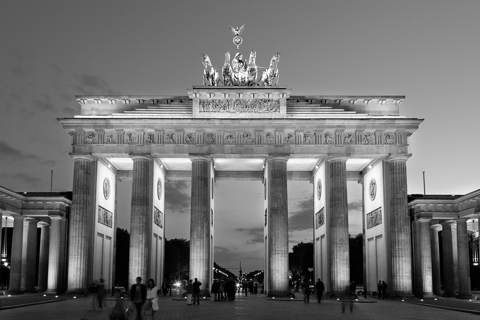

In [4]:
small = bw.resize(new_size)
small

In [5]:
a = np.array(small).astype(np.float64)
a.shape, a.dtype

((320, 480), dtype('float64'))

In [6]:
kernel = np.zeros((5, 5), dtype=np.float64)
kernel[1,:] = -1.0
kernel[2,:] = 2.0
kernel[3,:] = -1.0
kernel

array([[ 0.,  0.,  0.,  0.,  0.],
       [-1., -1., -1., -1., -1.],
       [ 2.,  2.,  2.,  2.,  2.],
       [-1., -1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [8]:
def convolve(image, kernel):
    """apply a 5x5 convolutional kernel on the image"""
    feature_map = []
    for y in range(0, image.shape[0] - 4):
        for x in range(0, image.shape[1] - 4):
            dot = (image[y:y+5, x:x+5] * kernel).sum()
            feature_map.append(dot)
    
    # reshape, cutting of borders
    feature_map = np.array(feature_map, dtype=np.float64)
    new_shape = image.shape[0] - 4, image.shape[1] - 4
    return feature_map.reshape(new_shape)


In [12]:
def scale(fm, threshold=120):
    """scale with a threshold value found by trial and error"""
    fm += threshold
    fm[fm < 0] = 0.0
    fm = 255 * fm / fm.max()
    fm = fm.astype(np.uint8)  # prepare for image
    return fm

In [13]:
fm_horizontal = scale(convolve(a, kernel))
fm_vertical = scale(convolve(a, kernel.T))

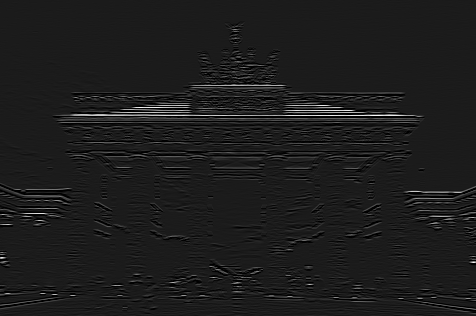

In [14]:
Image.fromarray(fm_horizontal, mode='L')

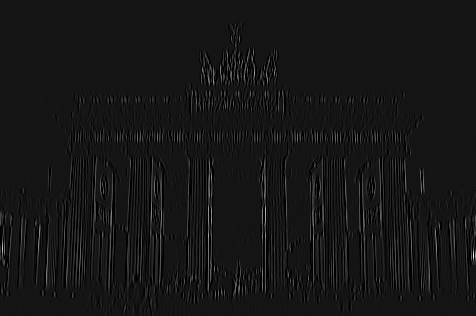

In [15]:
Image.fromarray(fm_vertical, mode='L')

In [17]:
b = np.zeros((fm_horizontal.shape[0], fm_horizontal.shape[1], 3), dtype=np.uint8)
b[:,:,0] = fm_horizontal
b[:,:,1] = fm_vertical

In [22]:
final = Image.fromarray(b, mode='RGB')

In [25]:
final = final.resize((final.size[0]*2, final.size[1]*2)) # increase image size

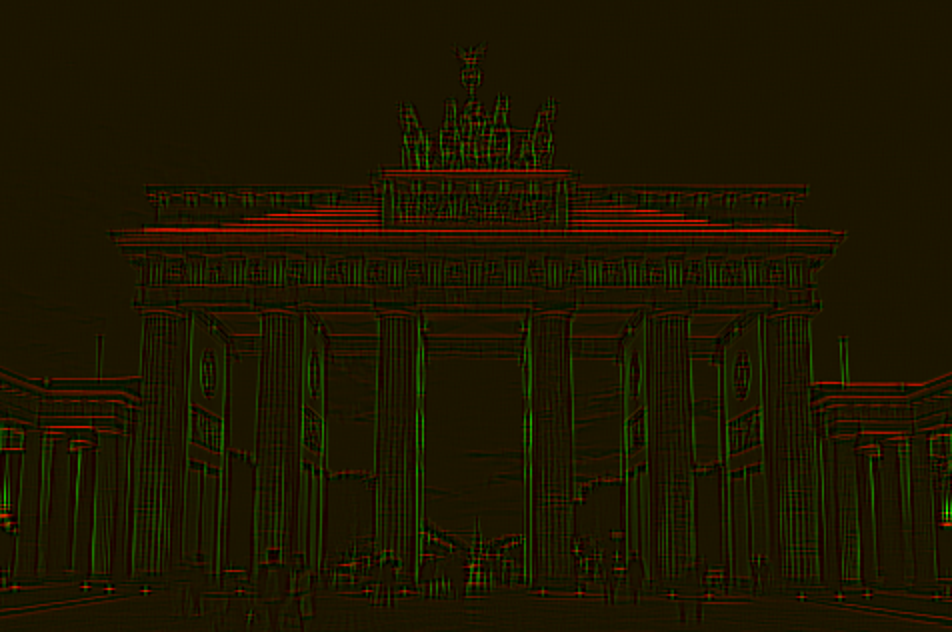

In [26]:
final

In [20]:
final.save('convolution.png')